# Cloud droplets and water activity



## Henry's Law (S\&P 7.2)
Activity of a substance can be expressed through Henry's Law, which states that the activity of a gas in a liquid is proportional to the partial pressure of the gas in equilibrium with the liquid. The proportionality constant is called the Henry's constant, and is a characteristic of the gas-liquid pair. The Henry's constant is a measure of the solubility of the gas in the liquid. 

$$ [liquid] = H [gas] $$

where $[liquid]$ is the concentration of the gas in the liquid, $H$ is the Henry's constant, and $[gas]$ is the partial pressure of the gas in equilibrium with the liquid.

You may have seen this approach in a Civil and Envriomental or introductory chemistry course.

This approach fails when the soluite is at high concentrations, so it usually doesn't work for aerosol particales. 

## Activity Coefficents (S\&P 10.1.4)

In chemical thermodynamics, activity (symbol a) is a measure of the "effective concentration" of a species in a mixture, in the sense that the species' chemical potential depends on the activity of a real solution in the same way that it would depend on concentration for an ideal solution. The term "activity" in this sense was coined by the American chemist Gilbert N. Lewis in 1907.

By convention, activity is treated as a dimensionless quantity, although its value depends on customary choices of standard state for the species. The activity of pure substances in condensed phases (solid or liquids) is normally taken as unity (the number 1). Activity depends on temperature, pressure and composition of the mixture, among other things. For gases, the activity is the effective partial pressure, and is usually referred to as fugacity.

The difference between activity and other measures of concentration arises because the interactions between different types of molecules in non-ideal gases or solutions are different from interactions between the same types of molecules. The activity of an ion is particularly influenced by its surroundings.
wiki link: https://en.wikipedia.org/wiki/Thermodynamic_activity

For a liquid mixture:
$$ a_i = \gamma_i x_i $$

where $a_i$ is the activity of species $i$, $x_i$ is the mole fraction of species $i$, and $\gamma_i$.  The activity coefficient $\gamma_i$ is a dimensionless quantity that is a function of temperature, pressure, and composition.

For a gas mixture:
In most laboratory situations, the difference in behaviour between a real gas and an ideal gas is dependent only on the pressure and the temperature, not on the presence of any other gases. At a given temperature, the "effective" pressure of a gas $i$ is given by its fugacity $f_i$: this may be higher or lower than its mechanical pressure. By historical convention, fugacities have the dimension of pressure, so the dimensionless activity.

$$ a_{i}={\frac {f_{i}}{p^{\ominus }}}=\varphi _{i}y_{i}{\frac {p}{p^{\ominus }}} $$

where $\varphi$ is the dimensionless fugacity coefficient of the species, $y_i$ is its fraction in the gaseous mixture ($y = 1$ for a pure gas) and $p$ is the total pressure. The value $p^{\ominus }$ is the standard pressure: it may be equal to 1 atm (101.325 kPa).

For an ideal gas, where the $\varphi$ is equal to 1, the activity is equal to the mole fraction. Which is the case for most of the gases in the atmosphere.

$$ a_{i} \approx y_{i}{\frac {p}{p^{\ominus }}} = \frac {p_{water}}{p_{sat}} = 100~\times~[Relative~Humidity]  $$


## Equilibrium Vapor Pressure (S\&P 10.1.5)

When the gas-phase and liquid-phase are in thermodynamic equilibrium then the activity in each phase are equal.

$$ a_{i, liquid} = a_{i, gas} $$

So for aerosols this means:

$$ \gamma_i x_i = y_{i}{\frac {p}{p^{\ominus }}} $$

And for water this would be:

$$ \gamma_{water} x_{water} = 100~\times~[Relative~Humidity] $$

## Activity Coefficent Models

There are multiple activity coefficent models that can be used to calculate the activity coefficent of water in an aerosol. The most common are E-AIM, and AIOMFAC. We will work with AIOMFAC in this notebook as it is the most flexable. link https://aiomfac.lab.mcgill.ca/


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,9)
plt.rcParams["font.size"] = (16)

To get coefficents we need to define a compostion of the species, either by mass or mole fraction. We will use mass fraction for this example. 
Along with temperature.

In [2]:
mass_fraction = np.logspace(-5,0,50)
temperature = np.ones_like(mass_fraction)*(273.15 + 25)

# combine the two arrays into a single matrix
# first is temperature, second is mass fraction
for i, t in enumerate(temperature):
    print(t, ', ', mass_fraction[i])

298.15 ,  1e-05
298.15 ,  1.2648552168552958e-05
298.15 ,  1.5998587196060572e-05
298.15 ,  2.0235896477251556e-05
298.15 ,  2.559547922699533e-05
298.15 ,  3.237457542817647e-05
298.15 ,  4.094915062380427e-05
298.15 ,  5.1794746792312125e-05
298.15 ,  6.55128556859551e-05
298.15 ,  8.286427728546843e-05
298.15 ,  0.00010481131341546853
298.15 ,  0.00013257113655901095
298.15 ,  0.00016768329368110083
298.15 ,  0.00021209508879201905
298.15 ,  0.0002682695795279727
298.15 ,  0.000339322177189533
298.15 ,  0.00042919342601287783
298.15 ,  0.0005428675439323859
298.15 ,  0.0006866488450042998
298.15 ,  0.000868511373751353
298.15 ,  0.0010985411419875584
298.15 ,  0.0013894954943731374
298.15 ,  0.001757510624854793
298.15 ,  0.0022229964825261957
298.15 ,  0.002811768697974231
298.15 ,  0.0035564803062231283
298.15 ,  0.004498432668969444
298.15 ,  0.005689866029018299
298.15 ,  0.0071968567300115215
298.15 ,  0.009102981779915217
298.15 ,  0.011513953993264481
298.15 ,  0.014563484775

Paste that output to the AIOMFAC website and click "Run Model". This will give you the activity coefficent for all spcies in the mixture.

Then save the data, and load it into the notebook. We'll just load the activity coefficent for water.

In [3]:
file_path = 'AIOMFAC_output_0291.txt'
data_water = pd.read_csv(file_path, sep='\s+', header=None, names=['no.','T_[K]','RH_[%]','w(01)','x_i(01)','m_i(01)','a_coeff_x(01)','a_x(01)','flag'], skiprows=101, nrows=50)
# data = np.loadtxt(file_path, skiprows=103, delimiter='\s+', max_rows=20)
data_water.head()

,no.,T_[K],RH_[%],w(01),x_i(01),m_i(01),a_coeff_x(01),a_x(01),flag
0,1,298.15,100.00,0.999968,0.999980,55.5084,1.0,0.999980,0
1,2,298.15,100.00,0.999959,0.999975,55.5084,1.0,0.999975,0
2,3,298.15,100.00,0.999948,0.999968,55.5084,1.0,0.999968,0
3,4,298.15,100.00,0.999934,0.999960,55.5084,1.0,0.999960,0
4,5,298.15,99.99,0.999917,0.999949,55.5084,1.0,0.999950,0


In [4]:
gamma_water = data_water['a_coeff_x(01)'].values
a_water = data_water['a_x(01)'].values
mole_fraction_water = data_water['x_i(01)'].values
mass_fraction_water = data_water['w(01)'].values

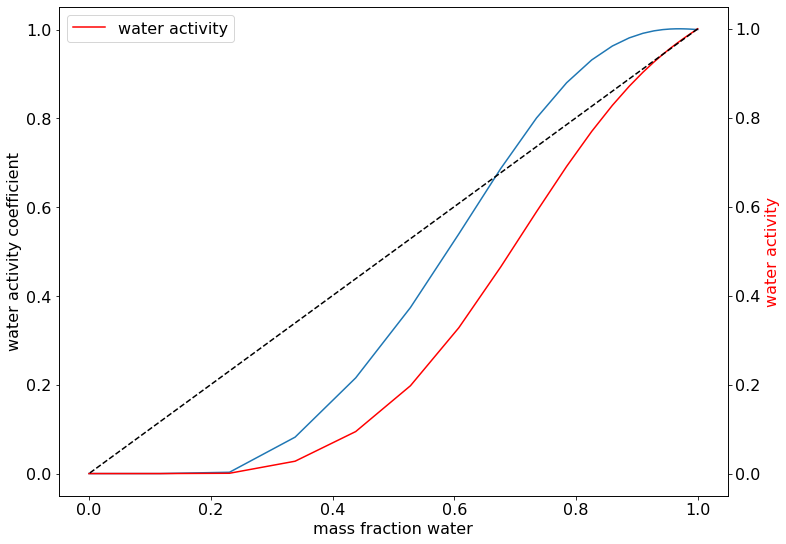

In [5]:
fig, ax = plt.subplots()
ax.plot(mole_fraction_water, gamma_water, label='gamma')
ax2=ax.twinx()
ax2.plot(mole_fraction_water, a_water, label='water activity', color='red')
ax2.plot(mole_fraction_water, mole_fraction_water, linestyle='--', color='black')
ax.set_xlabel('mass fraction water')
ax.set_ylabel('water activity coefficient')
ax2.set_ylabel('water activity', color='red', )
# ax.legend()
ax2.legend()
plt.show()

# Kohler Curve
Using this water activity we can calculate a kohler curve. The kohler curve is a plot of the water activity of a droplet as a function of the droplet radius. The kohler curve is a useful tool for understanding the growth of cloud droplets.

To acount for the droplet curvature, we'll need the Kelvin equation. The Kelvin equation is a relationship between the surface tension of a liquid and the radius of a spherical droplet of that liquid. The Kelvin equation is given by:
$$ \ln {\frac {p}{p_{\rm {sat}}}}={\frac {2\sigma V_{\text{m}}}{rRT}}$$

where $p$ is the partial pressure of the gas in the droplet, $p_{sat}$ is the saturation pressure of the gas, $\sigma$ is the surface tension of the liquid, $V_m$ is the molar volume of the gas, $r$ is the gas constant, and $T$ is the temperature. 

It is more accruate to use activity as, partial pressure assumes ideal gas behavior, which is not the case always. So for an aerosol, water activity is:
$$ \ln {\frac {a_{water-vapor}}{a_{water-aerosol}}}={\frac {2\sigma V_{\text{m}}}{rRT}}$$

We'll define a Kelvin radius such that:
$$ r_{Kelvin} = \frac {2\sigma V_{\text{m}}}{RT} $$

Then: 
$$ \ln {\frac {a_{water-vapor}}{a_{water-aerosol}}}= \frac {r_{Kelvin}}{r_{wet}} $$


We'll pull in some code from particula and define a few new functions.

In [6]:
from particula import u
from particula.util.input_handling import in_temperature, in_density
from particula.util.input_handling import in_handling, in_molecular_weight
from particula.constants import GAS_CONSTANT

In [7]:

def kelvin_radius(surface_tension, molecular_weight, density, temperature):
    """ Kelvin radius (Neil's definition)
        https://en.wikipedia.org/wiki/Kelvin_equation
    """

    temperature = in_temperature(temperature).to_base_units()
    molecular_weight = in_molecular_weight(molecular_weight).to_base_units()
    density = in_density(density).to_base_units()
    surface_tension = in_handling(surface_tension, u.N/u.m)

    return 2 * surface_tension * molecular_weight / (
        GAS_CONSTANT * temperature * density
    )


def h2o_kelvin_radius(temperature):
    """ Kelvin radius for H2O """

    temperature = in_temperature(temperature)

    return kelvin_radius(
        surface_tension=0.072 * u.N/u.m,
        molecular_weight=0.01815 * u.kg/u.mol,
        density=1000 * u.kg/u.m**3,
        temperature=temperature
    )

def mole_fraction_to_mass_fraction(mole_fraction1, mole_fraction2, molecular_weight1, molecular_weight2):
    """ Convert mole fraction to volume fraction
    """
    mass_fraction1 = mole_fraction1 * molecular_weight1 / (mole_fraction1 * molecular_weight1 + mole_fraction2 * molecular_weight2)
    mass_fraction2 = 1 - mass_fraction1
    return mass_fraction1, mass_fraction2

def mass_fraction_to_volume_fraction(mass_fraction1, mass_fraction2, density1, density2):
    """ Convert mass fraction to volume fraction
    """
    volume_fraction1 = (mass_fraction1 / density1) / (mass_fraction1 / density1 + mass_fraction2 / density2)
    volume_fraction2 = 1 - volume_fraction1
    return volume_fraction1, volume_fraction2

def volume_of_water_from_species_fraction(volume_fraction_species, volume_of_species):
    """ Calculate volume of water in a mixture
    """
    return (1 - volume_fraction_species) * volume_of_species/volume_fraction_species

def volume_sphere(radius):
    """ Calculate volume of sphere
    """
    return 4/3 * np.pi * radius**3

def radius_sphere(volume):
    """ Calculate radius of sphere
    """
    return (3*volume/(4*np.pi))**(1/3)


In [8]:
dry_radius = 25
volume_dry = volume_sphere(dry_radius)

density_spcies_g_cm3 = 2.17 
density_water_g_cm3 = 1.0

volume_fraction_water, volume_fraction_species = mass_fraction_to_volume_fraction(mass_fraction_water, 1-mass_fraction_water, density_water_g_cm3, density_spcies_g_cm3 )

volume_water = volume_of_water_from_species_fraction(volume_fraction_species, volume_dry)
volume_total = volume_water + volume_dry
radius_total = radius_sphere(volume_total)

dry_radius2 = 50
volume_dry2 = volume_sphere(dry_radius2)
volume_water2 = volume_of_water_from_species_fraction(volume_fraction_species, volume_dry2)
volume_total2 = volume_water2 + volume_dry2
radius_total2 = radius_sphere(volume_total2)

# Kelvin effect
a_water_vapor = a_water * np.exp(h2o_kelvin_radius(300).to(u.nm).m / radius_total)
a_water_vapor2 = a_water * np.exp(h2o_kelvin_radius(300).to(u.nm).m / radius_total2)


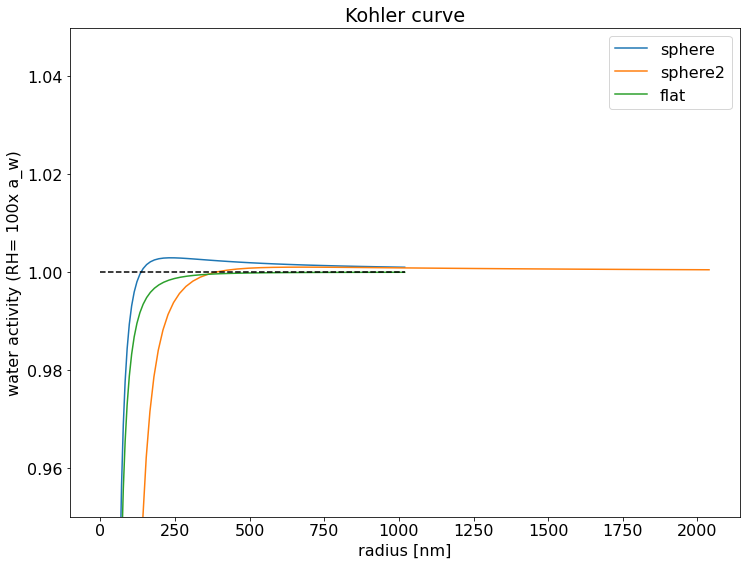

In [9]:
fig, ax = plt.subplots()
ax.plot(radius_total, a_water_vapor, label='sphere')
ax.plot(radius_total2, a_water_vapor2, label='sphere2')
ax.plot(radius_total, a_water, label='flat')
ax.plot([0,np.max(radius_total)], [1,1], linestyle='--', color='black')
ax.set_xlabel('radius [nm]')
ax.set_ylabel('water activity (RH= 100x a_w)')
ax.legend()
ax.set_ylim(0.95, 1.05)
ax.set_title('Kohler curve')
plt.show()


## Kappa the (hygroscopic parameter)

The hygroscopic parameter $\kappa$ is a measure of the hygroscopicity of a particle. It is defined to be a single parameter to relate the water and dry volumes $V$ to water activity. It trys to simplify the previous activity coefficent model into a single number.

$$ \frac{1}{a_{water-liquid}} = 1 + \kappa \frac{V_{species}}{V_{water}} $$

solving for $\kappa$:
$$ \kappa = (\frac{1}{a_{water-liquid}} - 1) \frac{V_{water}}{V_{species}}  $$

where $V_{wet}$ is the volume of the particle when it is wet, and $V_{dry}$ is the volume of the particle when it is dry.

We can calulate $\kappa$ for a give particle size using the previous activity coefficent model.

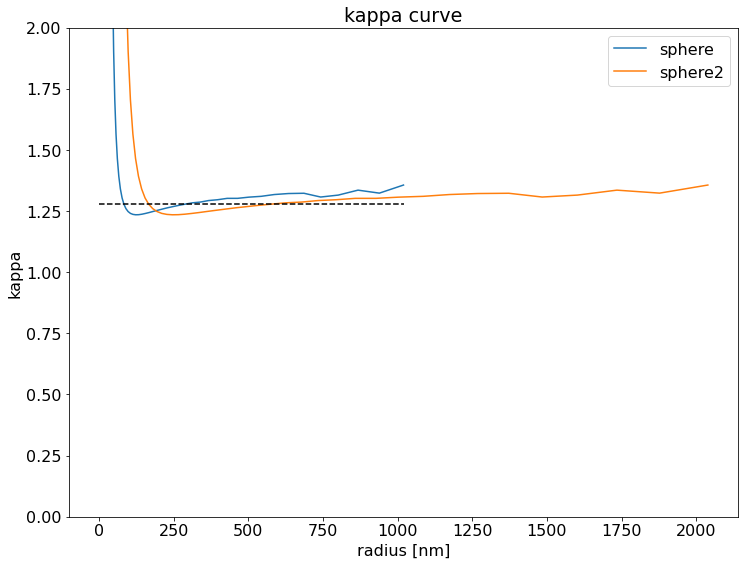

In [10]:
def kappa_from_volumes(volume_water, volume_dry, a_water):
    """ Calculate kappa from volumes
    """
    return  (1 - a_water) / a_water * (volume_water / volume_dry)

kappa1 = kappa_from_volumes(volume_water, volume_dry, a_water)
kappa2 = kappa_from_volumes(volume_water2, volume_dry2, a_water)

kappa_lit_NaCl = 1.28 # 

fig, ax = plt.subplots()
ax.plot(radius_total, kappa1, label='sphere')
ax.plot(radius_total2, kappa2, label='sphere2')
ax.plot([0,np.max(radius_total)], [kappa_lit_NaCl, kappa_lit_NaCl], linestyle='--', color='black')
ax.set_xlabel('radius [nm]')
ax.set_ylabel('kappa')
ax.legend()
ax.set_title('kappa curve')
ax.set_ylim(0, 2)
plt.show()


## $\kappa$ changes?

The $\kappa$ parameter for cloud simulations use is $\kappa_{ccn}$, which specifies the kappa value at the
critical supersaturation for cloud condensation nuclei (CCN). The kappa
value changes with water activity for non-ideal mixtures. This more general
kappa is call $\kappa_{HGF}$ (hygroscopic growth factor), and is derived from water activity models. The
$\kappa_{HGF}$ value at the CCN critical supersaturation (or activation point)
is $\kappa_{ccn}$ value.

References:
We used the kappa definition presented by:
Petters, M. D.,; Kreidenweis, S. M. (2007). A single parameter
representation of hygroscopic growth and cloud condensation nucleus
activity Atmospheric Chemistry and Physics, 7(8), 1961-1971.
https://doi.org/10.5194/acp-7-1961-2007

For more information on kappa_ccn and kappa_HGF, see Figure 9 in:
Gorkowski, K., Preston, T. C., &#38; Zuend, A. (2019).
Relative-humidity-dependent organic aerosol thermodynamics via an efficient
reduced-complexity model. Atmospheric Chemistry and Physics, June, 1-37.
https://doi.org/10.5194/acp-2019-495

## Compare $\kappa_{CCN}$ to activity coefficent modeling



In [11]:
def kappa_a_water_activity(kappa, wet_volume, dry_volume):
    """ Calculate water activity from kappa
    """
    return (1 + kappa * dry_volume / wet_volume)**-1

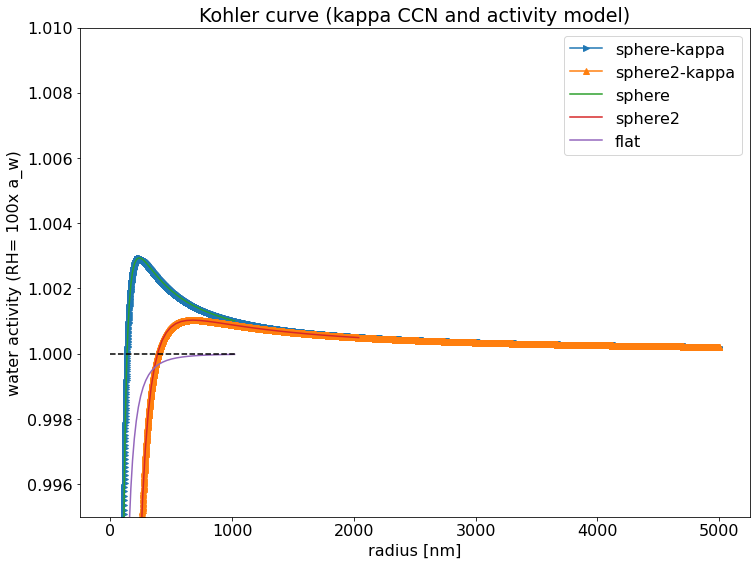

In [12]:
dry_radius_kappa1 = 25
volume_dry_kappa1 = volume_sphere(dry_radius_kappa1)
volume_water_kappa1 = volume_sphere(np.linspace(dry_radius_kappa1, 5000, 10000))
volume_total_kappa1 = volume_water_kappa1 + volume_dry_kappa1
radius_total_kappa1 = radius_sphere(volume_total_kappa1)

a_water_kappa1 = kappa_a_water_activity(kappa_lit_NaCl, volume_water_kappa1, volume_dry_kappa1)

dry_radius_kappa2 = 50
volume_dry_kappa2 = volume_sphere(dry_radius_kappa2)
volume_water_kappa2 = volume_sphere(np.linspace(dry_radius_kappa2, 5000, 10000))
volume_total_kappa2 = volume_water_kappa2 + volume_dry_kappa2
radius_total_kappa2 = radius_sphere(volume_total_kappa2)

a_water_kappa2 = kappa_a_water_activity(kappa_lit_NaCl, volume_water_kappa2, volume_dry_kappa2)

# Kelvin effect
a_water_vapor_kappa1 = a_water_kappa1 * np.exp(h2o_kelvin_radius(300).to(u.nm).m / radius_total_kappa1)
a_water_vapor_kappa2 = a_water_kappa2 * np.exp(h2o_kelvin_radius(300).to(u.nm).m / radius_total_kappa2)


fig, ax = plt.subplots()
ax.plot(radius_total_kappa1, a_water_vapor_kappa1, label='sphere-kappa', marker='>')
ax.plot(radius_total_kappa2, a_water_vapor_kappa2, label='sphere2-kappa', marker='^')
ax.plot(radius_total, a_water_vapor, label='sphere')
ax.plot(radius_total2, a_water_vapor2, label='sphere2')
ax.plot(radius_total, a_water, label='flat')
ax.plot([0,np.max(radius_total)], [1,1], linestyle='--', color='black')
ax.set_xlabel('radius [nm]')
ax.set_ylabel('water activity (RH= 100x a_w)')
ax.legend()
ax.set_ylim(0.995, 1.01)
# ax.set_xlim(0, 1000)
ax.set_title('Kohler curve (kappa CCN and activity model)')
plt.show()

## How about some more realistic aerosol?

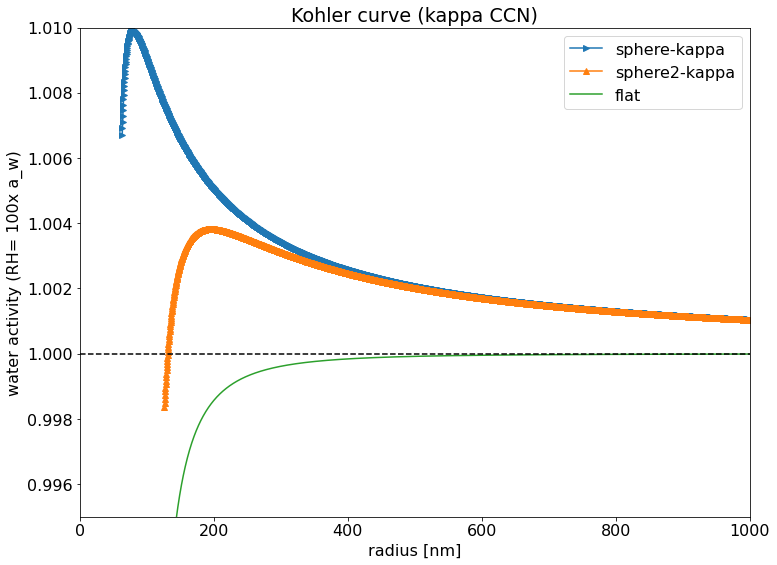

In [24]:
kappa_value = 0.01

dry_radius_kappa1 = 50
volume_dry_kappa1 = volume_sphere(dry_radius_kappa1)
volume_water_kappa1 = volume_sphere(np.linspace(dry_radius_kappa1, 5000, 10000))
volume_total_kappa1 = volume_water_kappa1 + volume_dry_kappa1
radius_total_kappa1 = radius_sphere(volume_total_kappa1)

a_water_kappa1 = kappa_a_water_activity(kappa_value, volume_water_kappa1, volume_dry_kappa1)

dry_radius_kappa2 = 100
volume_dry_kappa2 = volume_sphere(dry_radius_kappa2)
volume_water_kappa2 = volume_sphere(np.linspace(dry_radius_kappa2, 5000, 10000))
volume_total_kappa2 = volume_water_kappa2 + volume_dry_kappa2
radius_total_kappa2 = radius_sphere(volume_total_kappa2)

a_water_kappa2 = kappa_a_water_activity(kappa_value, volume_water_kappa2, volume_dry_kappa2)

# Kelvin effect
a_water_vapor_kappa1 = a_water_kappa1 * np.exp(h2o_kelvin_radius(300).to(u.nm).m / radius_total_kappa1)
a_water_vapor_kappa2 = a_water_kappa2 * np.exp(h2o_kelvin_radius(300).to(u.nm).m / radius_total_kappa2)


fig, ax = plt.subplots()
ax.plot(radius_total_kappa1, a_water_vapor_kappa1, label='sphere-kappa', marker='>')
ax.plot(radius_total_kappa2, a_water_vapor_kappa2, label='sphere2-kappa', marker='^')
ax.plot(radius_total_kappa2, a_water_kappa2, label='flat')
ax.plot([0,np.max(radius_total_kappa2)], [1,1], linestyle='--', color='black')
ax.set_xlabel('radius [nm]')
ax.set_ylabel('water activity (RH= 100x a_w)')
ax.legend()
ax.set_ylim(0.995, 1.01)
ax.set_xlim(0, 1000)
ax.set_title('Kohler curve (kappa CCN)')
plt.show()